In [26]:
import numpy as np
from scipy import signal
from scipy import misc
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt

In [45]:
cd = Path.cwd()
fn = cd / "assets" / "harbour.jpg"
if fn.exists(): print(f'File {fn} located.')

ascent = np.array(Image.open(fn).convert('LA'))[:,:,0]

scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

File C:\Users\Peder\Documents\CBM-101\CBM101\H_Neural_Networks\assets\harbour.jpg located.


C:\Users\Peder\Anaconda3\envs\cbm101\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


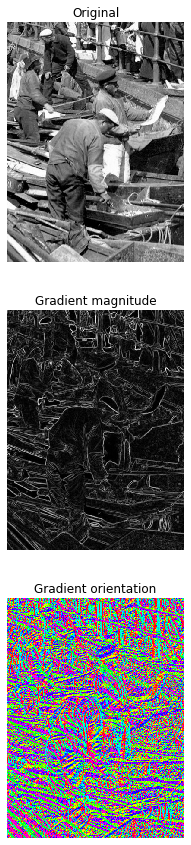

In [46]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()
fig.show()